In [13]:
import sys
import os
import SimpleITK
import numpy
import matplotlib.pyplot
sys.path.append(os.path.join(os.path.expanduser('~'),'software','src','nixSuite','wrapper'))
import nixWrapper
nixWrapper.loadLibrary('labkeyInterface')
import labkeyInterface
net=labkeyInterface.labkeyInterface()
fconfig=os.path.join(os.path.expanduser('~'),'.labkey','network.json')
net.init(fconfig)
net.getCSRF()
import labkeyFileBrowser
sys.path.append(os.getcwd())
import downloadPatient
fb=labkeyFileBrowser.labkeyFileBrowser(net)
project='dinamic_spect/Patients'
locDir=os.path.join(os.path.expanduser('~'),'temp','dynamicSPECT')
import labkeyDatabaseBrowser
db=labkeyDatabaseBrowser.labkeyDB(net)
ds=db.selectRows(project,'study','ImagingData',[])
patients=list(set([row['PatientId'] for row in ds['rows']]))


/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


User: andrej studen CSRF: e38e7c8505b76f18934e3fb0f5a0f262


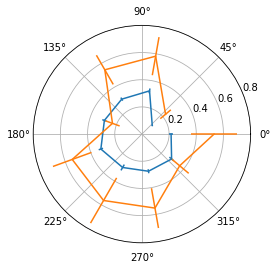

9


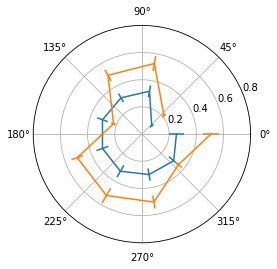

9


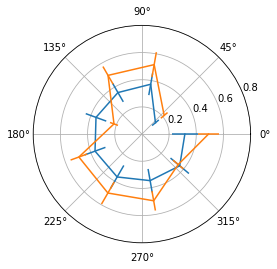

9


In [49]:
patients1=[patients[2]]
v1='k1'
var='Median'
for p in patients1:
    for nclass in [10,20,30]:
        rows=[r for r in ds['rows'] if r['PatientId']==p and abs(r['SequenceNum']-nclass)<1]
        nseg=len(rows)
        fx=100/nseg*2*numpy.pi*numpy.array([r['SequenceNum']-nclass for r in rows])
        fy=60*numpy.array([r[v1+'MIR'+var] for r in rows])
        fyerr=60*numpy.array([r[v1+'MIR'+var+'Std'] for r in rows])
        fy1=60*numpy.array([r[v1+'OBR'+var] for r in rows])
        fy1err=60*numpy.array([r[v1+'OBR'+var+'Std'] for r in rows])
        fig = matplotlib.pyplot.figure()
        ax = matplotlib.pyplot.axes(polar=True)
        ax.errorbar(fx, fy, yerr=fyerr, capsize=0)
        ax.errorbar(fx, fy1, yerr=fy1err, capsize=0)
        #ax.set_rorigin(-0.3)
        matplotlib.pyplot.yticks(0.1*numpy.arange(2, 10,2))
        matplotlib.pyplot.show()
        print(len(rows))

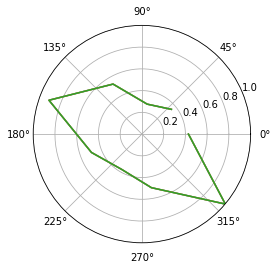

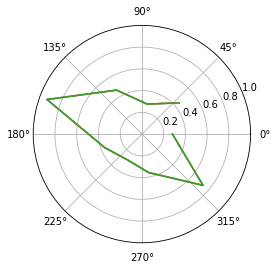

9


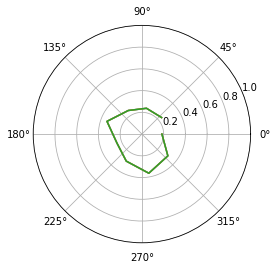

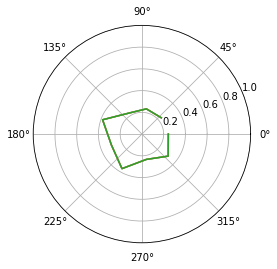

9


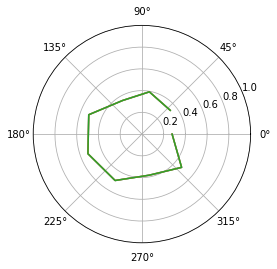

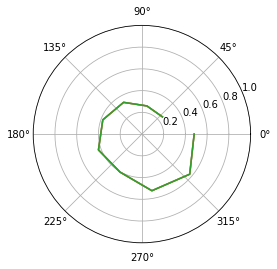

9


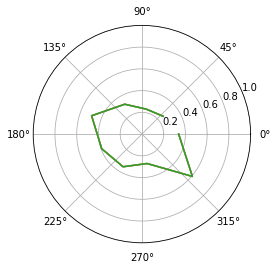

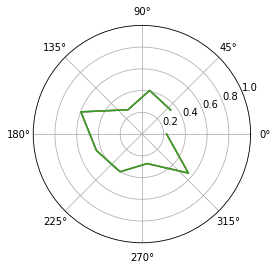

9


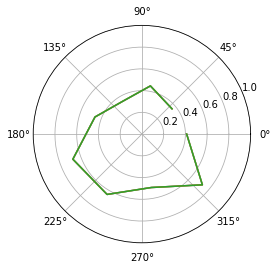

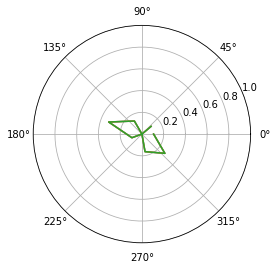

9


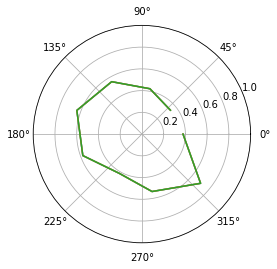

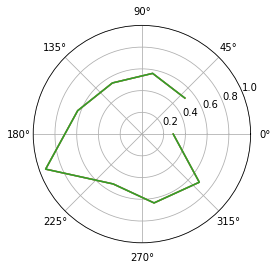

9


In [79]:
#plot comparisson by class
patients1=patients
v1='v19'
varCorrect=60
if v1=='v19':
    varCorrect=1e-3
var='Median'
for p in patients1:
    fig = matplotlib.pyplot.figure()
    ax = matplotlib.pyplot.axes(polar=True)
    for nclass in [10,20,30]:
        rows=[r for r in ds['rows'] if r['PatientId']==p and abs(r['SequenceNum']-nclass)<1]
        nseg=len(rows)
        fx=100/nseg*2*numpy.pi*numpy.array([r['SequenceNum']-nclass for r in rows])
        fy=varCorrect*numpy.array([r[v1+'MIR'+var] for r in rows])
        try:
            fyerr=varCorrect*numpy.array([r[v1+'MIR'+var+'Std'] for r in rows])
        except KeyError:
            fyerr=numpy.zeros(fy.shape)
        ax.errorbar(fx, fy, yerr=fyerr, capsize=0)
        ax.set_rlim(0,1)
    
    matplotlib.pyplot.show()
    fig = matplotlib.pyplot.figure()
    ax = matplotlib.pyplot.axes(polar=True)
    for nclass in [10,20,30]:
        rows=[r for r in ds['rows'] if r['PatientId']==p and abs(r['SequenceNum']-nclass)<1]
        nseg=len(rows)
        fy1=varCorrect*numpy.array([r[v1+'OBR'+var] for r in rows])
        try:
            fy1err=varCorrect*numpy.array([r[v1+'OBR'+var+'Std'] for r in rows])
        except KeyError:
            fy1err=numpy.zeros(fy1.shape)
        ax.errorbar(fx, fy1, yerr=fy1err, capsize=0)
        ax.set_rlim(0,1)
    matplotlib.pyplot.show()
    #ax.set_rorigin(-0.3)
    print(len(rows))

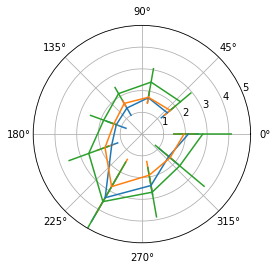

9


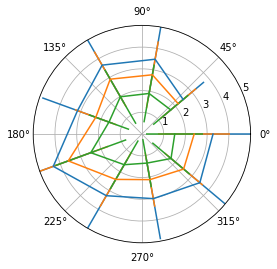

9


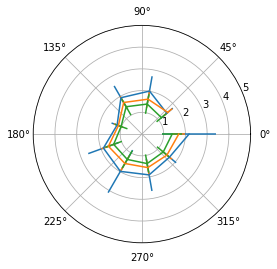

9


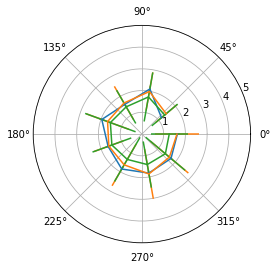

9


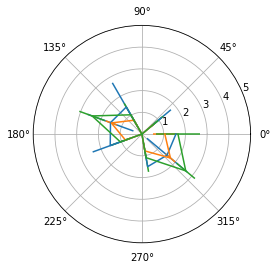

9


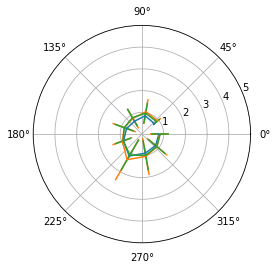

9


In [80]:
#plot comparisson by class
patients1=patients
v1='k1'
var='90p'
for p in patients1:
    fig = matplotlib.pyplot.figure()
    ax = matplotlib.pyplot.axes(polar=True)
    for nclass in [10,20,30]:
        rows=[r for r in ds['rows'] if r['PatientId']==p and abs(r['SequenceNum']-nclass)<1]
        nseg=len(rows)
        fx=100/nseg*2*numpy.pi*numpy.array([r['SequenceNum']-nclass for r in rows])
        fy=60*numpy.array([r[v1+'MIR'+var] for r in rows])
        try:
            fyerr=60*numpy.array([r[v1+'MIR'+var+'Std'] for r in rows])
        except KeyError:
            fyerr=numpy.zeros(fy.shape)
        fy1=60*numpy.array([r[v1+'OBR'+var] for r in rows])
        try:
            fy1err=60*numpy.array([r[v1+'OBR'+var+'Std'] for r in rows])
        except KeyError:
            fy1err=numpy.zeros(fy1.shape)
        fq=fy1/fy;
        fe=numpy.sqrt(numpy.power(fyerr/fy,2)+numpy.power(fy1err/fy1,2))*fq
        ax.errorbar(fx, fq, yerr=fe, capsize=0)
        ax.set_rlim(0,5)
    matplotlib.pyplot.show()
    #ax.set_rorigin(-0.3)
    print(len(rows))

(3, 6, 9)
0.21027698286315857


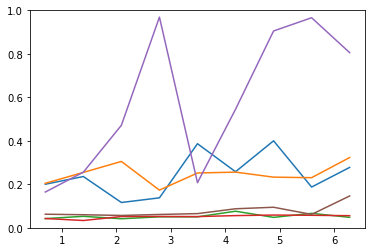

0.6761352546353504


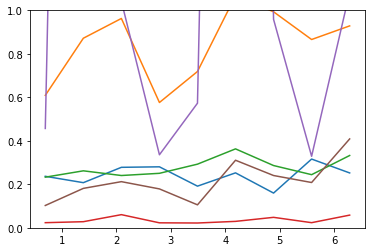

0.2885292919290429


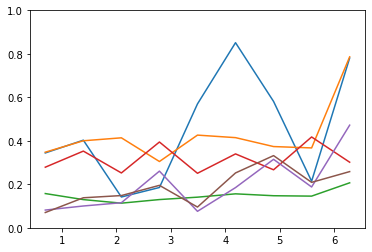

0.32453629820917174


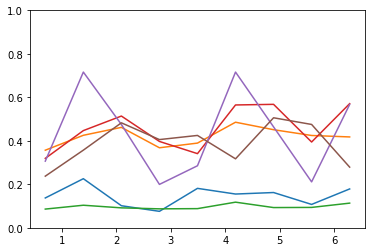

0.3057394935669287


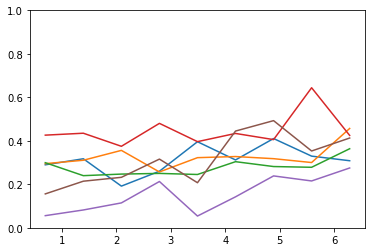

0.38411353004904286


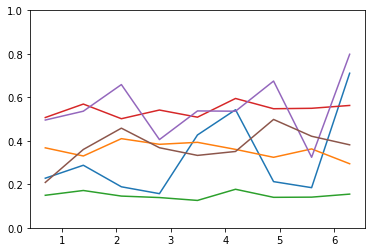

In [104]:
#plot errors (as function of nclass)
patients1=patients
v1='k1'
var='Median'

regions=list(set([r['regionId'] for r in ds['rows']]))
classes=list(set([r['nclass'] for r in ds['rows']]))

fy=numpy.zeros((len(classes),len(patients),len(regions)))
fy1=numpy.zeros((len(classes),len(patients),len(regions)))
print(fy.shape)
ip=0
for p in patients1:
    rows=[r for r in ds['rows'] if r['PatientId']==p]
    regions=list(set([r['regionId'] for r in rows]))
    classes=list(set([r['nclass'] for r in rows]))
    
    #average over class
    favg=numpy.zeros(len(regions))
    favg1=numpy.zeros(len(regions))
    for rid in regions:
        rows1=[r for r in rows if r['regionId']==rid]
        favg[rid-1]=60*numpy.mean(numpy.array([r[v1+'MIR'+var] for r in rows1]))
        favg1[rid-1]=60*numpy.mean(numpy.array([r[v1+'OBR'+var] for r in rows1]))
    
    ic=0    
    for nclass in classes:
        rows=[r for r in ds['rows'] if r['PatientId']==p and abs(r['SequenceNum']-nclass)<1]
        nseg=len(rows)
        fx=100/nseg*2*numpy.pi*numpy.array([r['SequenceNum']-nclass for r in rows])
        fy[ic,ip,:]=60*numpy.array([r[v1+'MIR'+var+'Std'] for r in rows])/favg
        fy1[ic,ip,:]=60*numpy.array([r[v1+'OBR'+var+'Std'] for r in rows])/favg1
        #matplotlib.pyplot.plot(fx, fyerr)
        #matplotlib.pyplot.plot(fx, fy1err)
        ic+=1
    #matplotlib.pyplot.ylim(0,1)
    #matplotlib.pyplot.title('This is a title')
    
    #matplotlib.pyplot.show()
    #ax.set_rorigin(-0.3)
    ip+=1
    
for ic in numpy.arange(fy.shape[0]):
    for ip in numpy.arange(fy.shape[1]):
        matplotlib.pyplot.plot(fx,fy[ic,ip,:])
    matplotlib.pyplot.ylim(0,1)
    print(numpy.mean(fy[ic,:,:]))
    matplotlib.pyplot.show()
    for ip in numpy.arange(fy1.shape[1]):
        matplotlib.pyplot.plot(fx,fy1[ic,ip,:])
    print(numpy.mean(fy1[ic,:,:]))
    matplotlib.pyplot.ylim(0,1)
    matplotlib.pyplot.show()